In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
data= pd.read_csv('/content/drive/MyDrive/train_loan.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [50]:
duplicated_rows=data.duplicated() # to check whether any duplicated values are present in the dataframe

In [51]:
duplicated_rows.sum() # no duplicated rows found

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 1. Finding missing values in dataset

In [ ]:
data.isna().sum() # returns the number of missing values in each row

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
data.isna().sum()/len(data)*100 # returns the percentage of missing values

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [53]:
data= data.dropna() # drop the missing values

In [54]:
data.shape

(520, 21)

In [ ]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
# to fill missing values in categorical columns (object column), we can use mode
# for numerical values we can use mean/median
# 4 categorical columns - Gender, Married, Dependents, Self_Employed
# 3 numerical columns - LoanAmount, Loan_Amount_Term, Credit_History



In [ ]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
data['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [ ]:
# repeated value is Male, so fill the missing value with this value

data['Gender']=data['Gender'].fillna('Male')

In [ ]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Married'].value_counts()

,count
Married,
Yes,398
No,213


In [ ]:
data['Married']=data['Married'].fillna('Yes')

In [ ]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
data['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [ ]:
data['Dependents']=data['Dependents'].fillna('0')

In [57]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82


In [ ]:
data['Self_Employed']=data['Self_Employed'].fillna('No')

In [ ]:
data.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


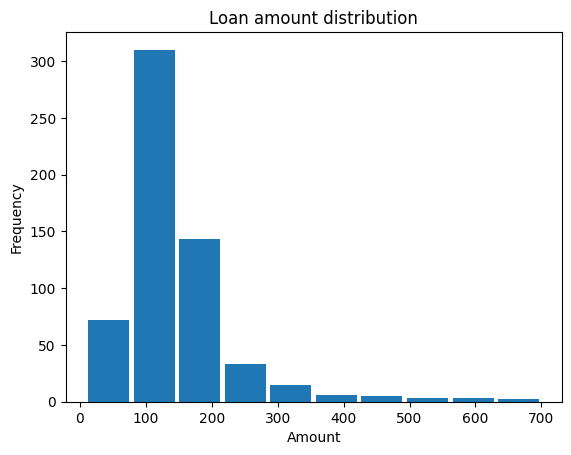

In [ ]:
# to check distribution of data, we can use histogram
# fill the numerical missing values, by checking data distribution

plt.hist(data['LoanAmount'],rwidth=0.9)
plt.title('Loan amount distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# the data is not normally distributed- go for median

data['LoanAmount'].median()

128.0

In [69]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())

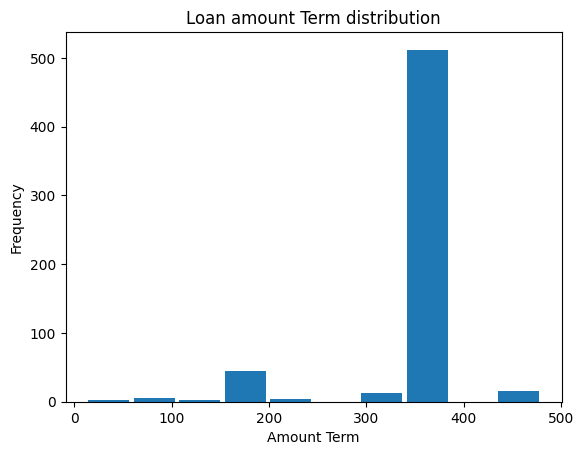

In [ ]:
plt.hist(data['Loan_Amount_Term'],rwidth=0.9)
plt.title('Loan amount Term distribution')
plt.xlabel('Amount Term')
plt.ylabel('Frequency')
plt.show()

In [71]:
data['Loan_Amount_Term'].median()

360.0

In [74]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

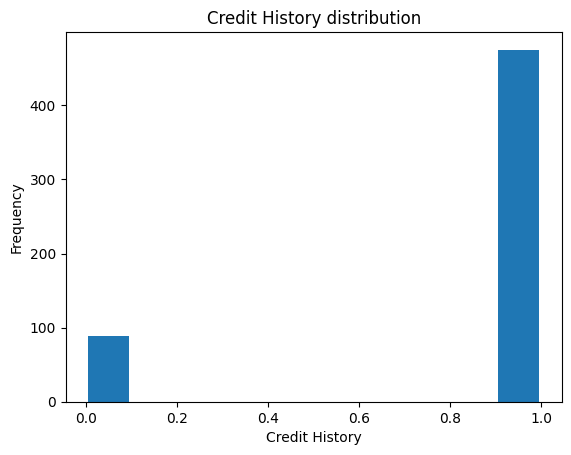

In [ ]:
plt.hist(data['Credit_History'],rwidth=0.9)
plt.title('Credit History distribution')
plt.xlabel('Credit History')
plt.ylabel('Frequency')
plt.show()

In [72]:
data['Credit_History'].median()

1.0

In [75]:
data ['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [6]:
data= data.dropna()

In [76]:
data.isna().sum() # removed all missing values

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
...,...
Property_Area_Rural,0
Property_Area_Semiurban,0
Property_Area_Urban,0
Loan_Status_N,0


In [ ]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


# 2. Outliers Detection

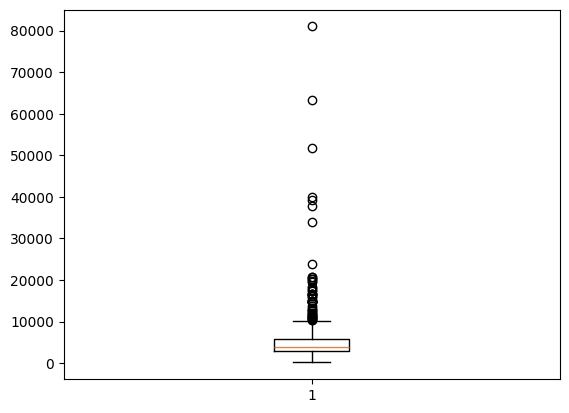

In [ ]:
# we need to find outliers in numerical columns only.

plt.boxplot(data['ApplicantIncome'])
plt.show()

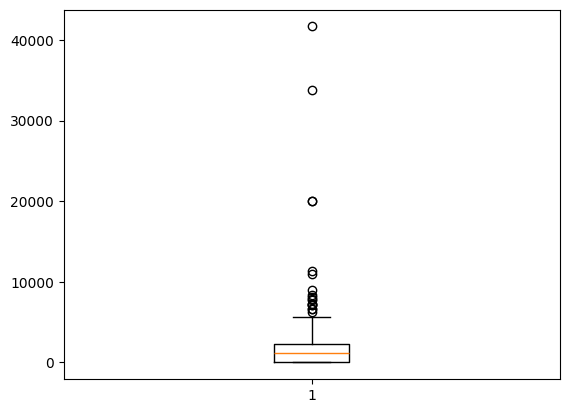

In [ ]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

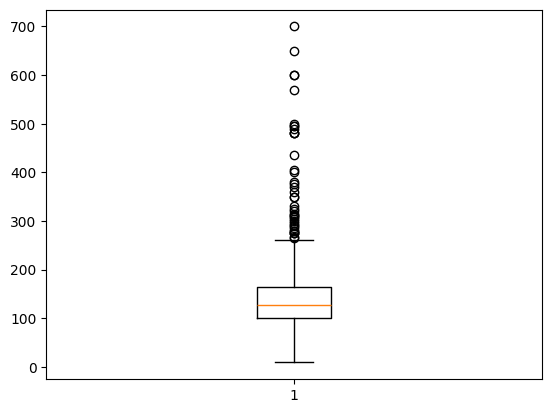

In [ ]:
plt.boxplot(data['LoanAmount'])
plt.show()

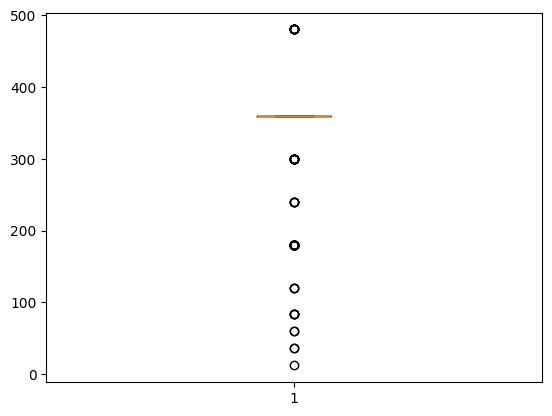

In [ ]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

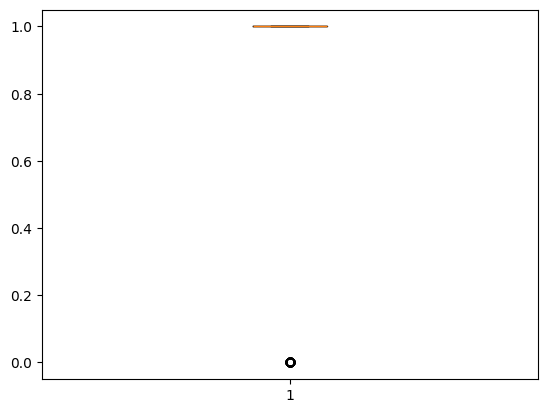

In [ ]:
plt.boxplot(data['Credit_History'])
plt.show()

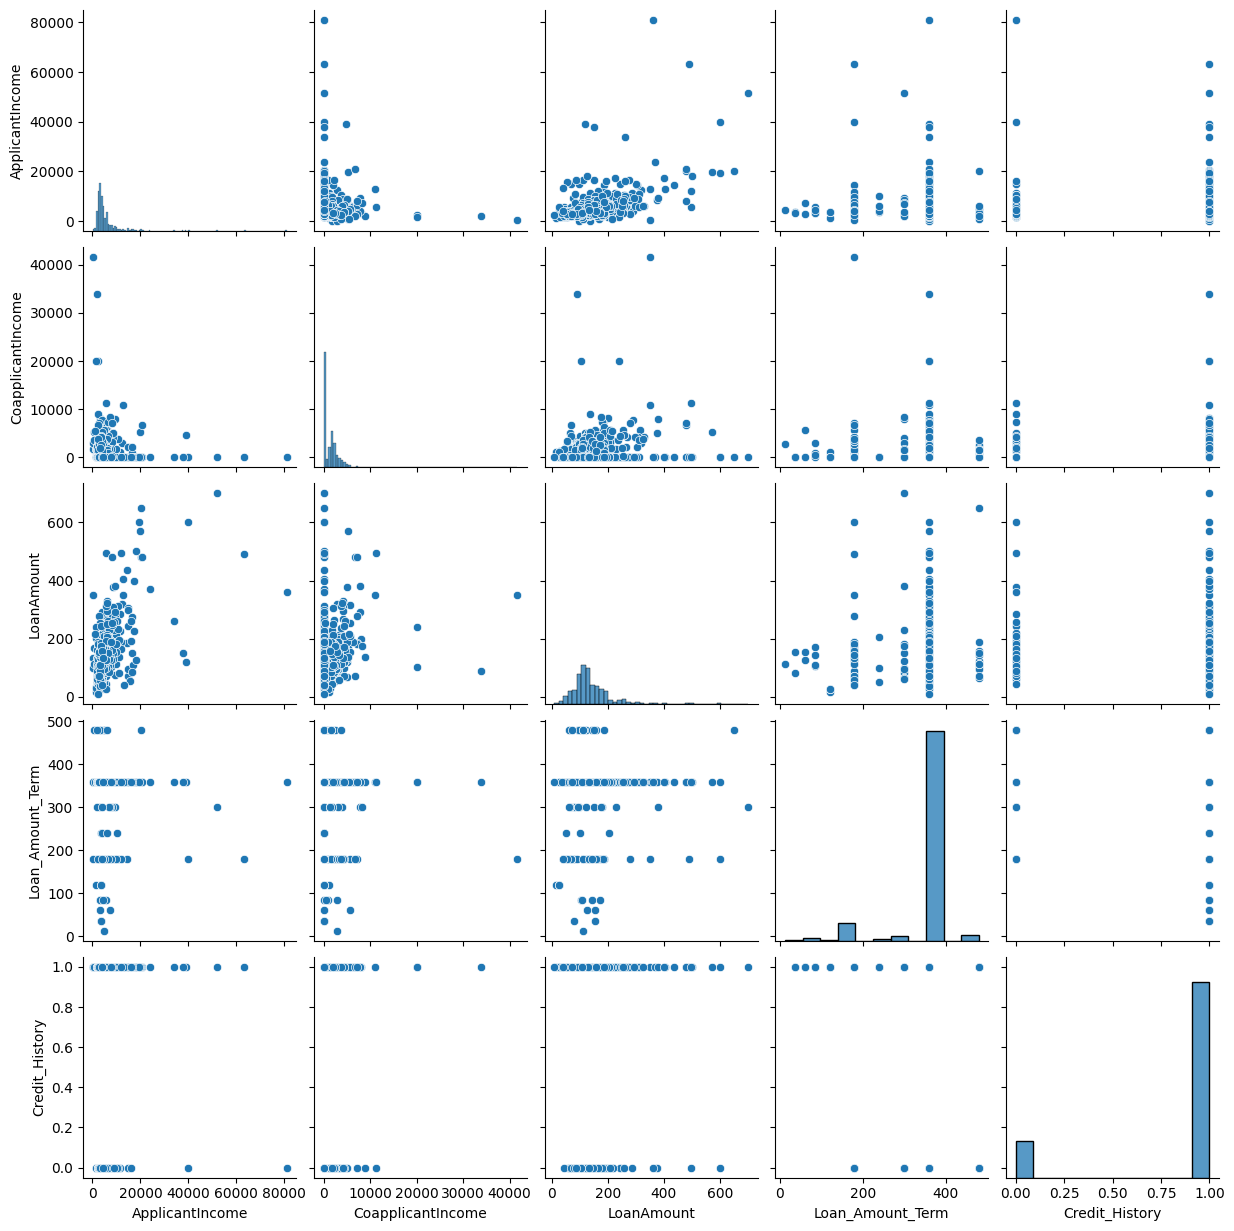

In [ ]:
import seaborn as sns
sns.pairplot(data)
plt.show()

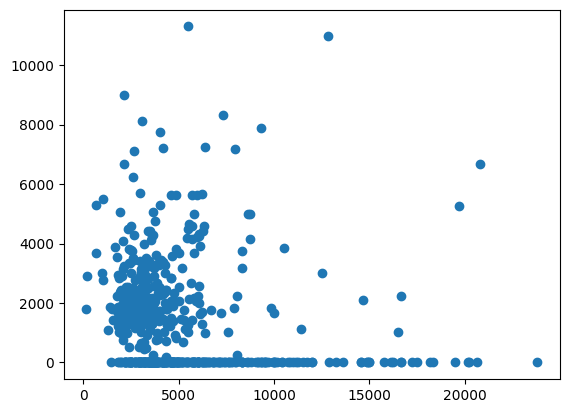

In [ ]:
plt.scatter(data['ApplicantIncome'],data['CoapplicantIncome'])
plt.show()

In [ ]:
data[data['ApplicantIncome']>30000].index

Index([], dtype='int64')

In [ ]:
data[data['CoapplicantIncome']>=20000].index  # removed outliers, and then run this code again hence not showing any outliers now

Index([], dtype='int64')

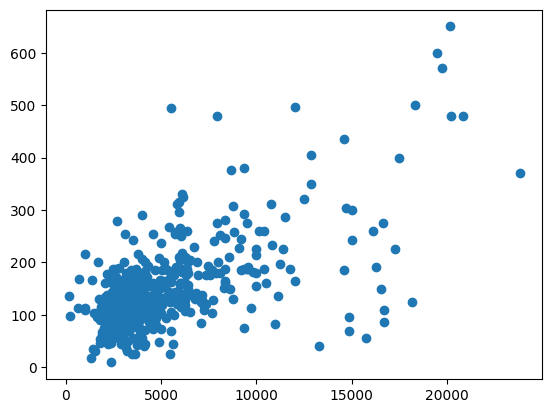

In [ ]:
plt.scatter(data['ApplicantIncome'],data['LoanAmount'])
plt.show()

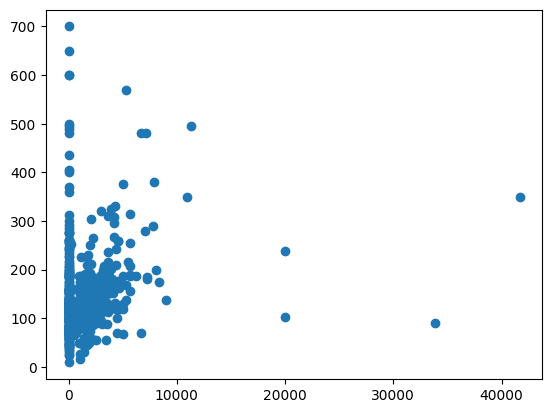

In [10]:
plt.scatter(data['CoapplicantIncome'],data['LoanAmount'])
plt.show()

In [11]:
data[data['LoanAmount']>600].index

Index([130, 171], dtype='int64')

In [12]:
data[data['CoapplicantIncome']>20000].index

Index([581, 600], dtype='int64')

In [14]:
data.drop([130,171,581,600],inplace=True)

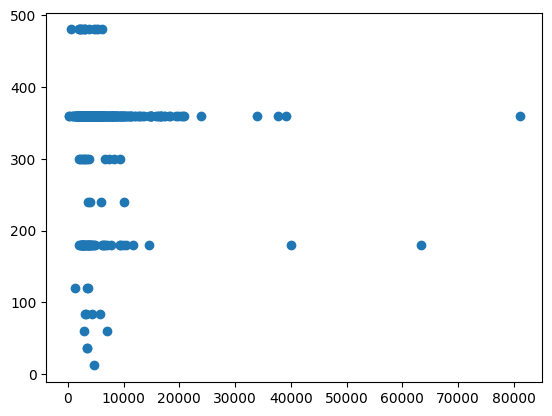

In [15]:
plt.scatter(data['ApplicantIncome'],data['Loan_Amount_Term'])
plt.show()

In [18]:
data[data['ApplicantIncome']>50000].index

Index([333, 409], dtype='int64')

In [19]:
data.drop([333,409],inplace=True)

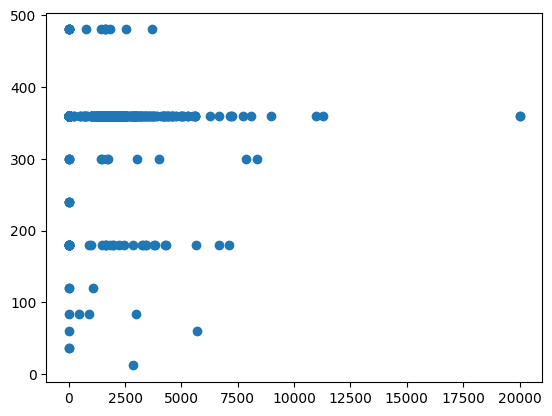

In [20]:
plt.scatter(data['CoapplicantIncome'],data['Loan_Amount_Term'])
plt.show()


In [22]:
data[data['CoapplicantIncome']>=20000].index

Index([402, 417], dtype='int64')

In [24]:
data.drop([402,417],inplace=True)

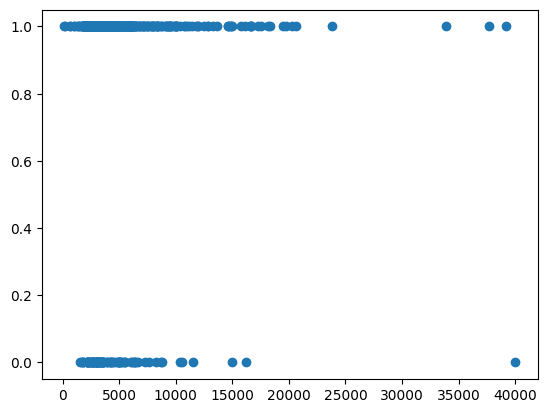

In [25]:
plt.scatter(data['ApplicantIncome'],data['Credit_History'])
plt.show()

In [26]:
data[data['ApplicantIncome']>35000].index

Index([155, 185, 443], dtype='int64')

In [27]:
data.drop([155,185,443],inplace=True)

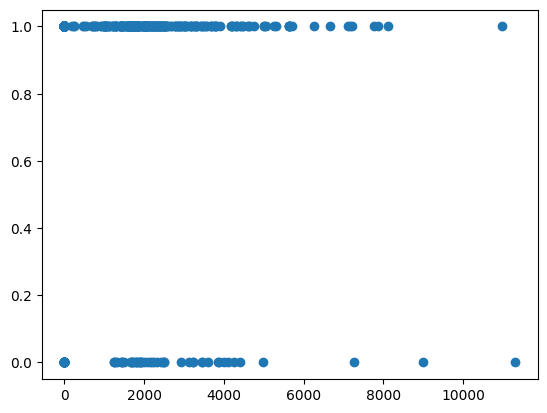

In [28]:
plt.scatter(data['CoapplicantIncome'],data['Credit_History'])
plt.show()

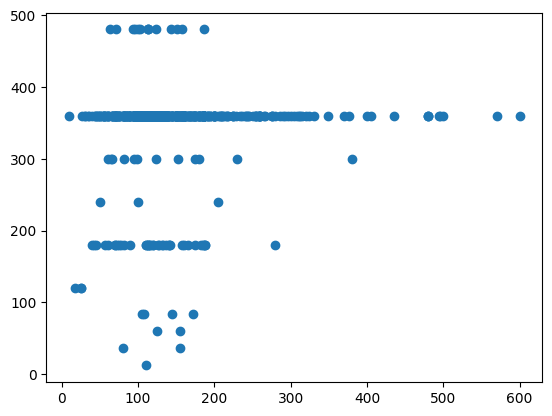

In [29]:
plt.scatter(data['LoanAmount'],data['Loan_Amount_Term'])
plt.show()

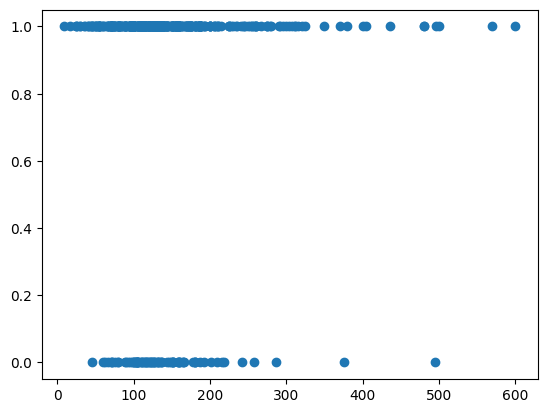

In [30]:
plt.scatter(data['LoanAmount'],data['Credit_History'])
plt.show()

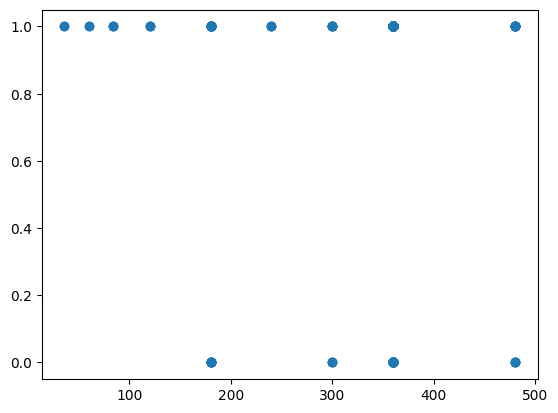

In [31]:
plt.scatter(data['Loan_Amount_Term'],data['Credit_History'])
plt.show()

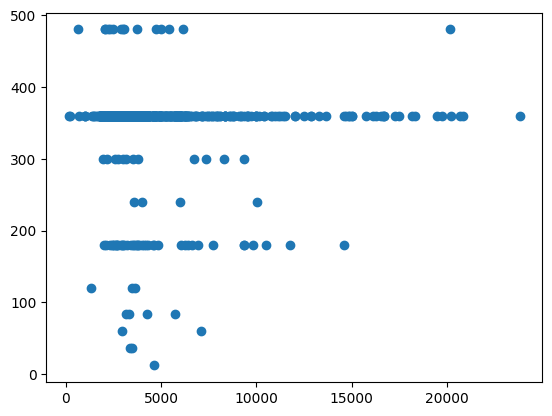

In [ ]:
plt.scatter(data['ApplicantIncome'],data['Loan_Amount_Term'])
plt.show()

# 3. Encoding

In [46]:
data.dtypes

,0
Loan_ID,object
Gender,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
Loan_Status,object
Married_No,bool
Married_Yes,bool


In [40]:
# one hot encoding- not looking into order preference
# label encoding- data converted to ascending order, so lowest value will take value 0 and the correspondingly, if large datas are present (large range) then label encoding is not used

In [78]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1


In [8]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
data['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [60]:
data['Dependents']=data['Dependents'].str.replace('+','')

In [62]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [26]:
data['Gender']=le.fit_transform(data['Gender'])

In [27]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [28]:
# one hot encoding
data=pd.get_dummies(data,dtype=int)

In [29]:
data.head()

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
1,1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,1,3000,0.0,66.0,360.0,1.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,1,2583,2358.0,120.0,360.0,1.0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
4,1,6000,0.0,141.0,360.0,1.0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
5,1,5417,4196.0,267.0,360.0,1.0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


# 4. Scaling

In [32]:
x= data.drop('Loan_Amount_Term',axis=1)
y= data['Loan_Amount_Term']

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [34]:
num_cols=['Credit_History']
x.loc[:,num_cols]=sc.fit_transform(x[num_cols])


In [35]:
x.head()

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
1,1,4583,1508.0,128.0,0.413197,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,1,3000,0.0,66.0,0.413197,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
3,1,2583,2358.0,120.0,0.413197,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1
4,1,6000,0.0,141.0,0.413197,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
5,1,5417,4196.0,267.0,0.413197,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,1
